In [1]:
from __init__ import *
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

from data_analysis import Analyze
from mc2pdf import MCprocessing
from datamanage import DataIO
from montecarlo import MonteCarlo
from analytical_solutions import AnalyticalSolution, gaussian
from mc2pdf import MCprocessing
from pdfsolver import PdfGrid
from visualization import Visualize
from Learning import PDElearn
from helper_functions import latexify_varcoef
import numpy as np
import pdb
import time


files = [
'advection_reaction_analytical_635_195_886.txt',
'advection_reaction_analytical_635_195_323.txt',
'advection_reaction_analytical_635_195_871.txt',
'advection_reaction_analytical_635_195_807.txt',
'advection_reaction_analytical_635_195_411.txt',
'advection_reaction_analytical_635_195_902.txt',
'advection_reaction_analytical_635_195_757.txt',
'advection_reaction_analytical_635_195_160.txt',
'advection_reaction_analytical_635_195_307.txt',
'advection_reaction_analytical_635_195_752.txt',
'advection_reaction_analytical_635_195_730.txt'
]

case = '_'.join(files[0].split('_')[:-3])
print(case)


# GET LEARNING DATA
output_vec = []
metadata_vec = []
for i, f in enumerate(files):
	D = DataIO(case=case, directory=LEARNDIR)
	output, metadata = D.readLearningResults(f)
	output_vec.append(output)
	metadata_vec.append(metadata)

# GET PDF
dataman = DataIO(case, directory=PDFDIR) 
fu0, gridvars, ICparams = dataman.loadSolution('advection_reaction_analytical_635_195.npy', array_opt='marginal')
grid0 = PdfGrid(gridvars)


advection_reaction_analytical
advection_reaction_analytical_635_195.npy
╒═══════════════════════════════════════╤════════════════╤═══════════╤═════════════╤════════════╤═══════════════════════════════════════╤═════════════════════════╤════════════════════╤═════════════════════╕
│ File Name                             │ distribution   │   MCcount │ bandwidth   │   u_margin │ MCfile                                │ u                       │ t                  │ x                   │
╞═══════════════════════════════════════╪════════════════╪═══════════╪═════════════╪════════════╪═══════════════════════════════════════╪═════════════════════════╪════════════════════╪═════════════════════╡
│ advection_reaction_analytical_635_195 │ PDF            │     50000 │ scott       │     -1e-10 │ advection_reaction_analytical_635.npy │ [0.1613, 4.637, 0.0225] │ [0.0, 0.5, 0.0085] │ [-2.0, 3.0, 0.0218] │
╘═══════════════════════════════════════╧════════════════╧═══════════╧═════════════╧════════════╧═══

In [5]:
#######################################################################

A = Analyze()
portion_from_boundary = [m['ICparams']['adjustgrid']['mu'][0] for m in metadata_vec]
alpha, mse = A.getRegMseDependence_single(output)
alphas, coefficients, feats = A.getCoefRegDependence(output)
# mse = [np.min(output['mse_path']) for m in metadata_vec]

savename = 'advectreact_mse'

variable = portion_from_boundary
xlabel = 'Regularlization Coefficient'




In [14]:
output['alpha']

0.0

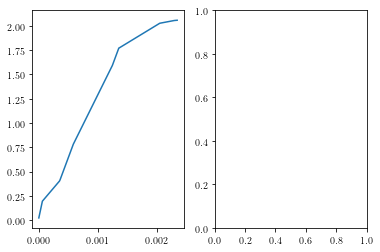

In [13]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(alpha, mse)
plt.show()